<h1 style="text-align: center;margin:-7px">Deep Learning Personal Activity</h1>
<h2 style="text-align: center;">Implement Deep Neural Network from scratch that is fully scalable</h2>
<h3 style="text-align: center;margin:3px">Student Name: Kollapudi Nagendra Dheeraj</h3>

In [1]:
#Basic File and Matrix Vectorized programming imports
import pandas as pd
import numpy as np

#Standard Imports for Doing Train Test Split and Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#For Flattening the List and Data Visualization
from itertools import cycle, chain

#For Visualization
import seaborn as sns

#For Stochaistic Gradient Descent, where batch_size = 1, we need to get random index of observation for training.
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def z_normalization(X):
    #Calculate the mean - column wise
    mean = np.mean(X, axis=0) 

    #Calculate the standard deviation - column wise
    sd = np.std(X, axis=0) 

    #Implement the formula as shown above:
    return (X - mean) / sd

In [3]:
def load_blobs_dataset():
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv("blobs250.csv")

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = z_normalization(df.values)     # convert the remaining columns to a numpy array
    
    #Splitting the whole dataset into 70%-30% for train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True)

    #Splitting the test dataset into 15%-15% for validation and test
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle = True)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [4]:
def load_moons_dataset():
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv("moons400.csv")

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = z_normalization(df.values)  # convert the remaining columns to a numpy array
    
    #Splitting the whole dataset into 70%-30% for train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True)

    #Splitting the test dataset into 15%-15% for validation and test
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle = True)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [22]:
class FullyConnectedNN():
    def linear(self, z):
        return 0.1 * z
    
    def derivative_linear(self, z):
        return z
    
    def elu(self, z):
        return z if z >= 0 else 0.01*(e^z -1)
    
    def derivative_elu(self, z):
        return 1 if z > 0 else 0.01*np.exp(z)

    def relu(self, z):
        return np.maximum(0, z)
    
    def derivative_relu(self, z):
        z[z <= 0] = 0
        z[z  > 0] = 1
        return z
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def derivative_sigmoid(self, z):
        ds = self.sigmoid(z)
        return ds * (1 - ds)
    
    def leaky_relu(self, z):
        return np.maximum(0.01 * z, z)
        
    def derivative_leaky_relu(self, z):
        dz = np.ones_like(z)
        dz[z < 0] = 0.01
        return dz
        
    def tanh(self, z):
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
        
    def derivative_tan_h(self, z):
        return 1 - np.power(self.tanh(z), 2)
    
    def __init__(self, layers, layer_activation, learning_rate = 0.0075, num_iterations = 3000):
        self.layers = layers
        self.layer_activation = layer_activation
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.epilson = 0.000000000000000001
        
        self.params = {}
        L = len(layers)

        for l in range(1, L):
            self.params['W' + str(l)] = np.random.randn(self.layers[l], self.layers[l-1])*0.01
            self.params['b' + str(l)] = random.uniform(0, 1)
    
    
    def train(self, X, y):
        for iter in range(self.num_iterations):
            AL, caches = self.forward_prop(X)
            cost = self.compute_cost(AL, y)
            if iter % 100 == 0:
                print(f'Completed {iter}')
            gradients = self.backward_prop(AL, y, caches)
            self.update_params()
            
            
    def forward_prop(self, X):
        caches = []
        A = X
        L = len(self.params) // 2
        
        for l in range(1, L+1):
            A, cache = self.forward_prop_activation(
                A.dot(self.params['W' + str(l)].T)+self.params['b' + str(l)], A, self.params['W' + str(l)], self.params['b' + str(l)], self.layer_activation[l-1])
            caches.append(cache)
        
        return A, caches
            
    def forward_prop_activation(self, Z, A_prev_f, weights_f, bias, activation):
        linear_cache = (A_prev_f, weights_f, bias)
        
        if activation == "sigmoid":
            A = self.sigmoid(Z)

        elif activation == "relu":
            A = self.relu(Z)

        elif activation == "elu":
            A = self.elu(Z)
            
        elif activation == "leaky_relu":
            A = self.leaky_relu(Z)
            
        elif activation == "linear":
            A = self.linear(Z)

        elif activation == "tanh":
            A = self.tanh(Z)
            
        cache = (linear_cache, Z)
        return A, cache
           
    def compute_cost(self, AL, Y):
        m = Y.shape[0]
        Y = Y.reshape((m, 1))
        cost = (1./m) * (-np.dot(Y,np.log(AL + self.epilson).T) - np.dot(1-Y, np.log(1-AL + self.epilson).T))
        return np.squeeze(cost)
            
    
    def backward_prop(self, AL, Y, caches):
        self.gradients = {}
        L = len(caches)
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)

        dAL = - (np.divide(Y, AL + self.epilson) - np.divide(1 - Y, 1 - AL  +self.epilson))

        current_cache = caches[L-1]
        self.gradients["dA" + str(L-1)], self.gradients["dW" + str(L)], self.gradients["db" + str(L)] = self.backward_prop_activation(dAL, current_cache, activation = self.layer_activation[L - 1])

        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.backward_prop_activation(
                self.gradients["dA" + str(l + 1)], current_cache, activation = self.layer_activation[l])
            self.gradients["dA" + str(l)] = dA_prev_temp
            self.gradients["dW" + str(l + 1)] = dW_temp
            self.gradients["db" + str(l + 1)] = db_temp

        return self.gradients
            
            
    def backward_prop_activation(self, dA, cache, activation):
        linear_cache, activation_cache = cache
    
        if activation == "relu":
            dZ = self.derivative_relu(dA)

        elif activation == "sigmoid":
            dZ = self.derivative_sigmoid(dA)
        
        elif activation == "elu":
            dZ = self.derivative_elu(dA)
            
        elif activation == "leaky_relu":
            dZ = self.derivative_leaky_relu(dA)
            
        elif activation == "linear":
            dZ = self.derivative_linear(dA)

        elif activation == "tanh":
            dZ = self.derivative_tan_h(dA)
        
        dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        return dA_prev, dW, db
        
    def linear_backward(self, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = 1./m * np.dot(dZ.T, A_prev)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(dZ, W)

        return dA_prev, dW, db     
        
        
    def update_params(self):
        L = len(self.params) // 2 # number of layers in the neural network

        # Update rule for each parameter. Use a for loop.
        for l in range(L):
            self.params["W" + str(l+1)] -= self.learning_rate * self.gradients["dW" + str(l+1)]
            self.params["b" + str(l+1)] -= self.learning_rate * self.gradients["db" + str(l+1)]

        return self.params

    def predict(self, X):
        probas, caches = self.forward_prop(X)
        if self.layers[-1] == 1:
            return [1 if val > 0.5 else 0 for val in probas]
        return probas

In [23]:
X_train, X_val, X_test, y_train, y_val, y_test = load_blobs_dataset()
nn = FullyConnectedNN(layers=[X_train.shape[1], 5, 1], layer_activation=['relu', 'tanh', 'sigmoid'])

nn.train(X_train, y_train)

<ipython-input-22-8b8724a6ac16>:107: RuntimeWarning: invalid value encountered in log
  cost = (1./m) * (-np.dot(Y,np.log(AL + self.epilson).T) - np.dot(1-Y, np.log(1-AL + self.epilson).T))
<ipython-input-22-8b8724a6ac16>:38: RuntimeWarning: overflow encountered in exp
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
<ipython-input-22-8b8724a6ac16>:38: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


Completed 0
Completed 100
Completed 200
Completed 300
Completed 400
Completed 500
Completed 600
Completed 700
Completed 800
Completed 900
Completed 1000
Completed 1100
Completed 1200
Completed 1300
Completed 1400
Completed 1500
Completed 1600
Completed 1700
Completed 1800
Completed 1900
Completed 2000
Completed 2100
Completed 2200
Completed 2300
Completed 2400
Completed 2500
Completed 2600
Completed 2700
Completed 2800
Completed 2900


In [24]:
#Fetching Accuracy on the training set
y_predict = nn.predict(np.concatenate((X_train, X_val), axis=0))
y_predict
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 0.50235
Accuracy on Test: 0.48649


In [25]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [26]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [27]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000


1032
1030


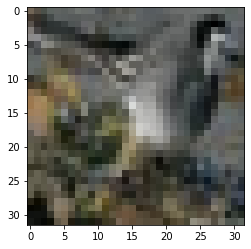

b'bird'


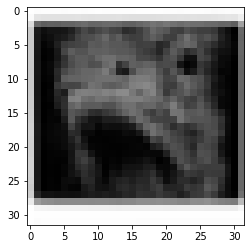

b'bird'


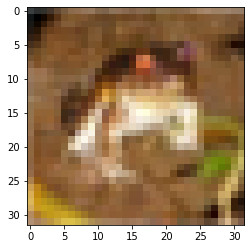

b'frog'


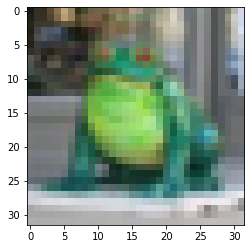

b'frog'


In [28]:
def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()
    
# Display a few images from the batch
bird_indices=[i for i,x in enumerate(labels) if x == 2]
frog_indices=[i for i,x in enumerate(labels) if x == 6]

print(len(bird_indices))
print(len(frog_indices))

indices = np.concatenate((bird_indices, frog_indices), axis = 0)
data_frog_bird = data[indices]

labels_numpy = np.array(labels)
data_frog_bird_labels = labels_numpy[indices]
# data_frog_bird_labels = data_frog_bird_labels.reshape(data_frog_bird_labels.shape[0], 1)

for i in range(1030, 1034):
    visualise(data_frog_bird, i)
    print(names[data_frog_bird_labels[i]])

In [29]:
from skimage.color import rgb2gray
# data_frog_bird = np.array(data_frog_bird[:,0:1024])
data_frog_bird_transformed = np.array(rgb2gray(data_frog_bird))

In [30]:
X = data_frog_bird_transformed/255

category_labelling = {2:0, 6:1}
y = np.array([category_labelling[i] for i in data_frog_bird_labels])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

nn = FullyConnectedNN(layers=[X_train.shape[1], 6, 4, 1], layer_activation=['relu', 'tanh', 'relu', 'sigmoid'])

nn.train(X_train, y_train)

Completed 0
Completed 100
Completed 200
Completed 300
Completed 400
Completed 500


<ipython-input-22-8b8724a6ac16>:38: RuntimeWarning: overflow encountered in exp
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
<ipython-input-22-8b8724a6ac16>:38: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


Completed 600
Completed 700
Completed 800
Completed 900
Completed 1000
Completed 1100
Completed 1200
Completed 1300
Completed 1400
Completed 1500
Completed 1600
Completed 1700
Completed 1800
Completed 1900
Completed 2000
Completed 2100
Completed 2200
Completed 2300
Completed 2400
Completed 2500
Completed 2600
Completed 2700
Completed 2800
Completed 2900


In [34]:
#Fetching Accuracy on the training set
y_predict = nn.predict(X_train)
print(f"\nAccuracy on Train: {accuracy_score(y_train, y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")


Accuracy on Train: 0.49688
Accuracy on Test: 0.50889


# 1 Hidden Layer

In [ ]:
class twoLNeuralNet():
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __init__(self, layers, learning_rate=0.01, max_iters=3000, threshold = 0.000001):
        self.layers = layers
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.threshold = threshold
        self.params = {}
        self.costs = []
        
        self.params['W1'] = np.random.randn(self.layers[1], self.layers[0])*0.01
        self.params['b1'] = random.uniform(0, 1)
        self.params['W2'] = np.random.randn(self.layers[2], self.layers[1])*0.01
        self.params['b2'] = random.uniform(0, 1)
        
    def train(self, X, y):
        y = y.reshape(y.shape[0], 1)
        j_prev = 0
        for iteration in range(self.max_iters):
            z1 = self.forward_prop(self.params['W1'], self.params['b1'], X)
            a1 = self.sigmoid(z1)
            
            z2 = self.forward_prop(self.params['W2'], self.params['b2'], a1)
            a2 = self.sigmoid(z2)
            
            epilson = 0.000000000000000001
            
            j_curr = self.cost_function(a2, y, epilson)
            
            dA2 = - (np.divide(y, a2 + epilson) - np.divide(1 - y, 1 - a2 + epilson))
            db2, dA1, dW2 = self.back_prop(dA2, z2, a1, self.params['W2'])
            db1, dA0, dW1 = self.back_prop(dA1, z1, X, self.params['W1'])
            
            self.params['W1'] -= self.learning_rate * dW1
            self.params['W2'] -= self.learning_rate * dW2
            
            self.params['b1'] -= self.learning_rate * db1
            self.params['b2'] -= self.learning_rate * db2
            
            if abs(float(j_curr - j_prev)) <= self.threshold:
                self.costs.append(j_curr)
                print(f'Break out Loss value: {j_curr:.5f}')
                break
            
            if iteration % 100 == 0:
                self.costs.append(j_curr)
                print(f'Loss at {iteration} iterations: {j_curr:.5f}')
            
            j_prev = j_curr
            
    def forward_prop(self, weights, bias, X):
        return np.dot(X, weights.T) + bias
    
    def cost_function(self, a2, y, epilson = 0.000000000000000001):
        m = y.shape[0]
        cost = (-1/m) * np.sum(np.multiply(y, np.log(a2 + epilson)) + np.multiply(1 - y, np.log(1 - a2 + epilson)))
        return np.squeeze(cost)
    
    def back_prop(self, da, z, a_prev, weights):
        activation = self.sigmoid(z)
        dZ = da * activation * (1 - activation)
        m = a_prev.shape[1]
        
        dW = (1/m) * np.dot(dZ.T, a_prev)
        db = (1/m) * np.sum(dZ)
        da_prev = np.dot(dZ, weights)
        return db, da_prev, dW
    
    def predict(self, X):
        z1 = self.forward_prop(self.params['W1'], self.params['b1'], X)
        a1 = self.sigmoid(z1)
            
        z2 = self.forward_prop(self.params['W2'], self.params['b2'], a1)
        return [1 if val > 0.5 else 0 for val in self.sigmoid(z2)]
    
    def plot_costs(self):
        plt.plot(self.costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate = " + str(self.learning_rate))
        plt.show()

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = load_moons_dataset()
nn = twoLNeuralNet(layers=[X_train.shape[1], 3, 1])

nn.train(X_train, y_train)

In [ ]:
#Fetching Accuracy on the training set
y_predict = nn.predict(np.concatenate((X_train, X_val), axis=0))
y_predict
print(f"\nAccuracy on Train: {accuracy_score(np.concatenate((y_train, y_val), axis=0), y_predict):.5f}")

#Fetching Accuracy on the test set
y_predict = nn.predict(X_test)
print(f"Accuracy on Test: {accuracy_score(y_test, y_predict):.5f}")